In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nFirst 5 rows:")
display(df.head())

print("\nMissing Values:")
print(df.isna().sum())

print("\nValue Counts (target classes):")
print(df['label'].value_counts())


Shape: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Value Counts (target classes):
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Feature columns
features = ["N","P","K","temperature","humidity","ph","rainfall"]
target = "label"

X = df[features]
y = df[target]

# Encode crop names → numeric classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-Test Split (stratified because balanced dataset)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("Classes:", list(le.classes_))


Train Shape: (1760, 7)
Test Shape: (440, 7)
Classes: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


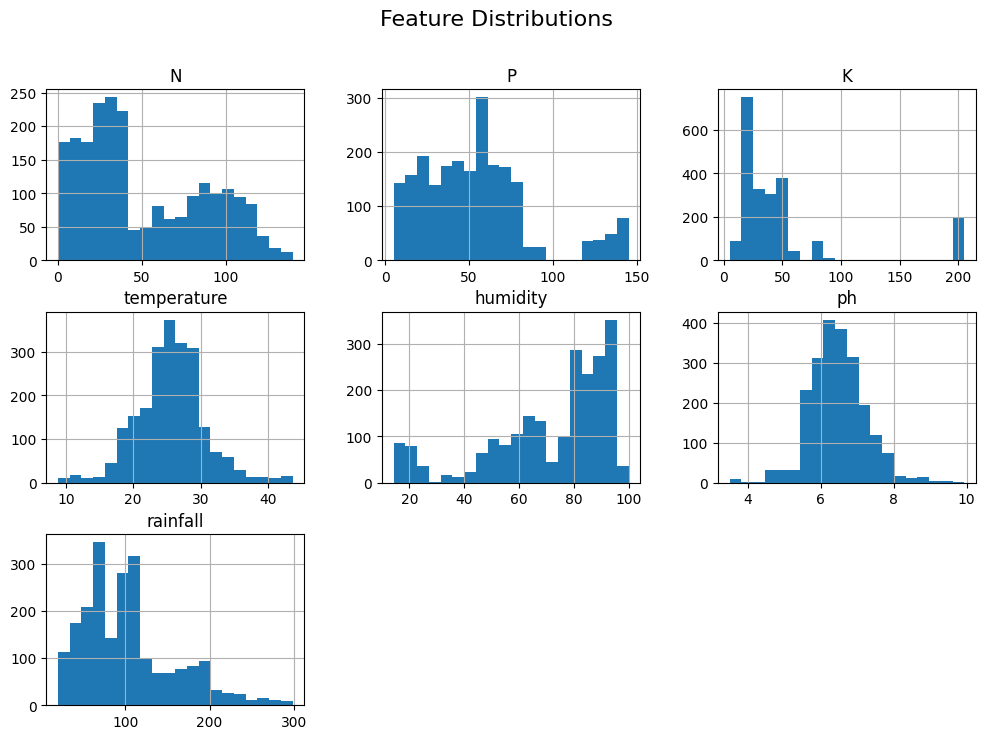

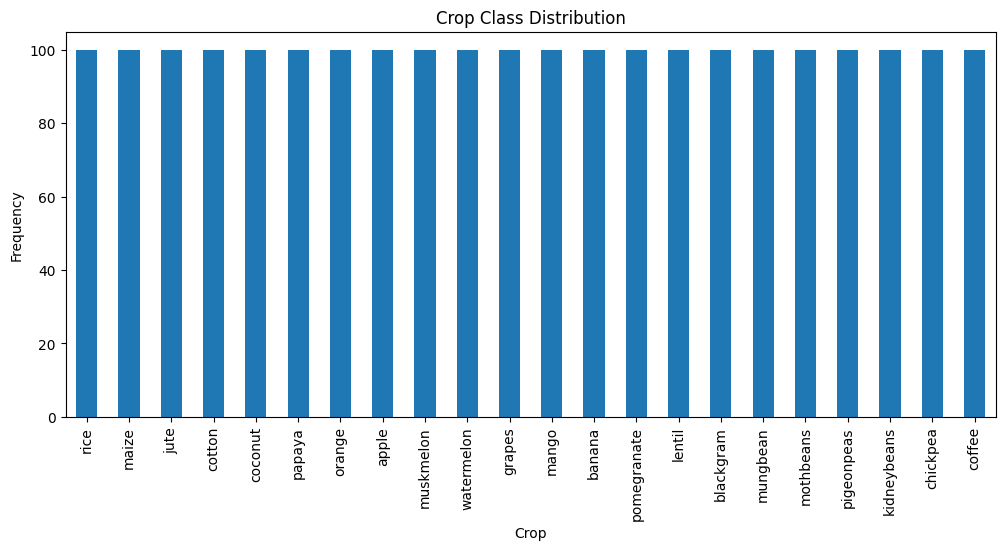

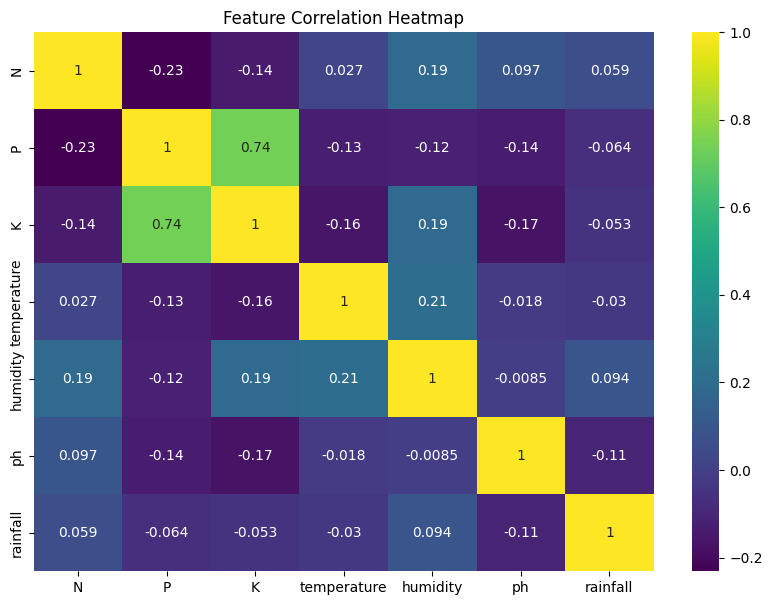

In [4]:
import matplotlib.pyplot as plt

# 1. Distribution of numeric features
df[features].hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 2. Crop frequency count
plt.figure(figsize=(12,5))
df['label'].value_counts().plot(kind='bar')
plt.title("Crop Class Distribution")
plt.xlabel("Crop")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# 3. Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(df[features].corr(), annot=True, cmap="viridis")
plt.title("Feature Correlation Heatmap")
plt.show()


In [5]:
!pip install lazypredict --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.9 MB/s eta 0:00:00


In [6]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

models.head(15)


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.30
ExtraTreesClassifier,1.00,1.00,None,1.00,0.17
GaussianNB,1.00,1.00,None,1.00,0.01
XGBClassifier,0.99,0.99,None,0.99,0.37
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.03
BaggingClassifier,0.99,0.99,None,0.99,0.08
LGBMClassifier,0.99,0.99,None,0.99,1.04
SVC,0.98,0.98,None,0.98,0.06
DecisionTreeClassifier,0.98,0.98,None,0.98,0.02


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import os

# Build final pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

# Train
pipeline.fit(X_train, Y_train)

# Evaluate
Y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred, target_names=le.classes_))


Accuracy: 0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        2

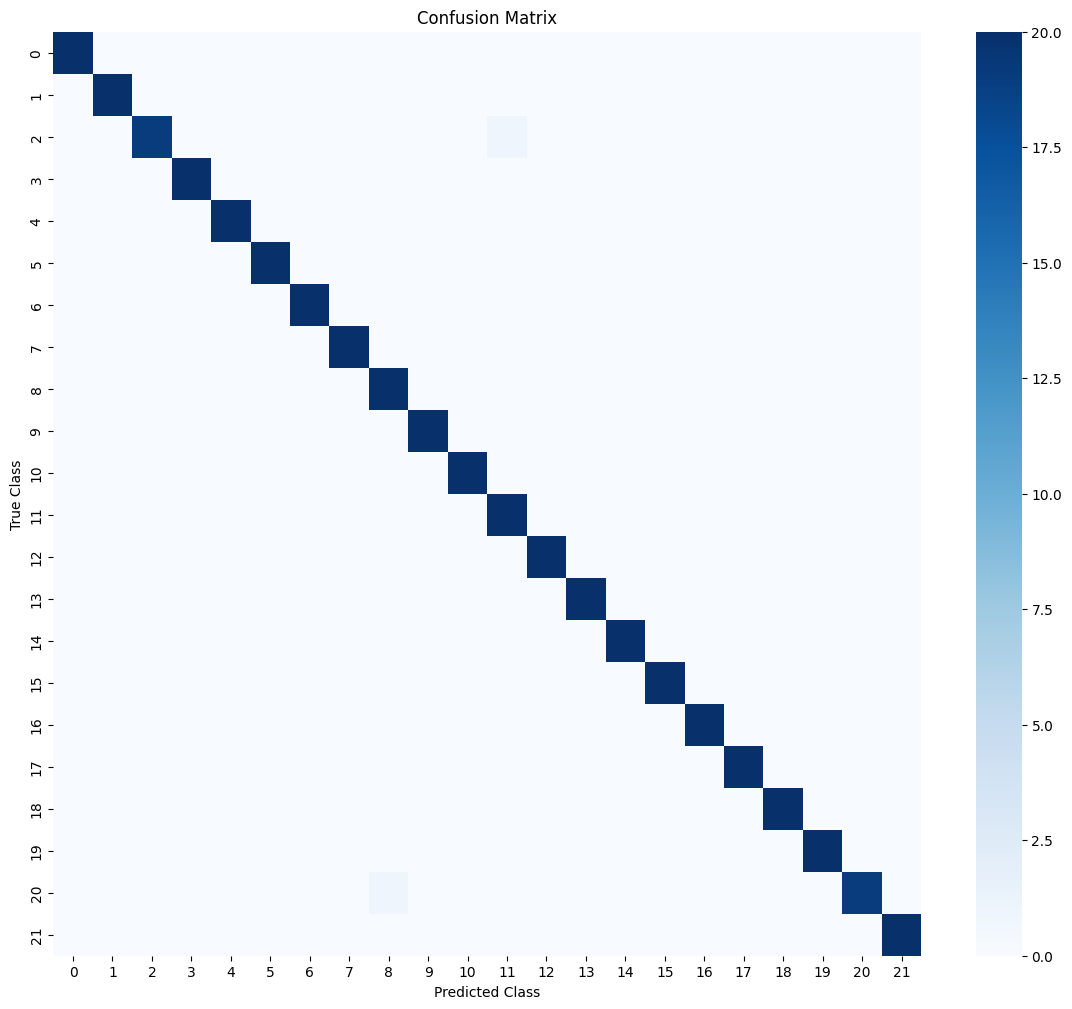

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(14,12))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


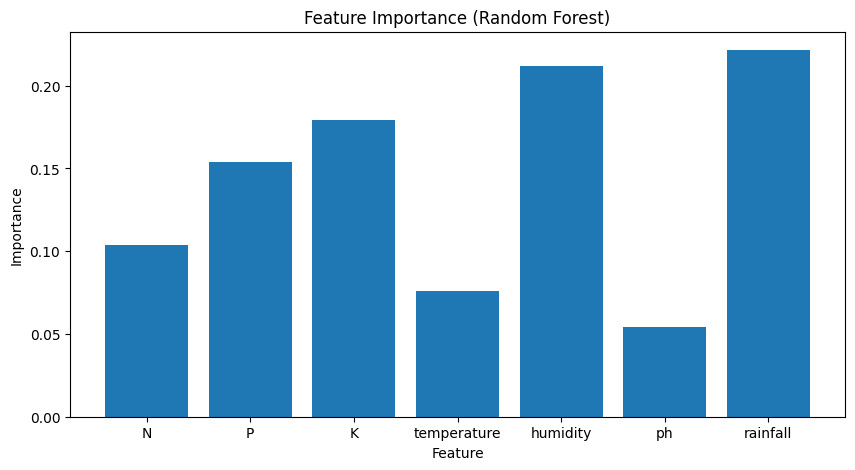

In [9]:
import numpy as np

rf = pipeline.named_steps["clf"]
importances = rf.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


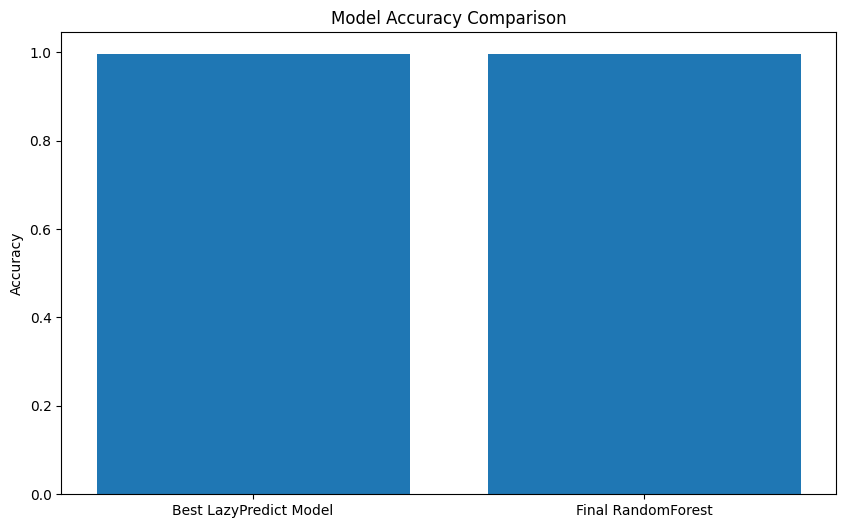

In [10]:
plt.figure(figsize=(10,6))
plt.bar(["Best LazyPredict Model", "Final RandomForest"], 
        [models["Accuracy"].max(), accuracy_score(Y_test, Y_pred)])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [11]:
MODEL_DIR = "/kaggle/working/models"
os.makedirs(MODEL_DIR, exist_ok=True)

joblib.dump(pipeline, f"{MODEL_DIR}/crop_recommender_pipeline.joblib")
joblib.dump(le, f"{MODEL_DIR}/label_encoder.joblib")

print("Models saved to:", MODEL_DIR)


Models saved to: /kaggle/working/models
